In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim

from torchvision import transforms
from torchvision import datasets
from torch.utils.data.sampler import SubsetRandomSampler
from utils import calculate_normalisation_params

from resnet import ResNet
from data_loader import get_data_loaders
from train_evaluate import train,evaluate

import warnings
warnings.filterwarnings('ignore')

# Getting the train_loader and the test_loader

In [4]:
data_dir = 'data/cifar10'
batch_size = 128
train_transform = transforms.Compose([
    transforms.Pad(4),
    transforms.RandomHorizontalFlip(0.5),
    transforms.RandomCrop(32),
    transforms.ToTensor()
])

test_transform = transforms.Compose([
    # For testing, we only evaluate the single
    # view of the original 32×32 image.
    transforms.ToTensor()
])
train_loader,test_loader = get_data_loaders(data_dir,batch_size,train_transform,test_transform)

100%|██████████| 170498071/170498071 [00:13<00:00, 12189242.21it/s]


Extracting data/cifar10/cifar-10-python.tar.gz to data/cifar10
Files already downloaded and verified


truck


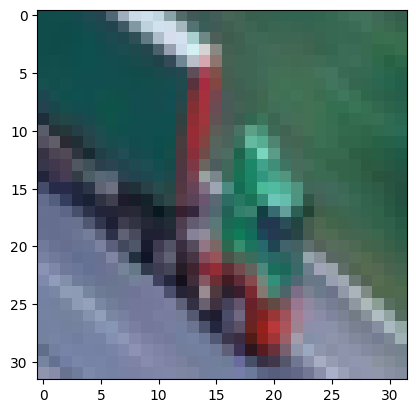

In [5]:
plt.imshow(train_loader.dataset.data[50])
print(train_loader.dataset.classes[train_loader.dataset.targets[50]])

# Normalizing the images

In [6]:
train_transform = transforms.Compose([
    transforms.ToTensor()
])

test_transform = transforms.Compose([
    transforms.ToTensor()
])

train_loader, test_loader = get_data_loaders(data_dir,
                                             batch_size,
                                             train_transform,
                                             test_transform,
                                             shuffle=True,
                                             num_workers=4,
                                             pin_memory=True)


# Takes a while to run so I've hardcoded results below

means, stds = calculate_normalisation_params(train_loader, test_loader)
print(f'means: {means}')
print(f'stds: {stds}')

Files already downloaded and verified
Files already downloaded and verified


KeyboardInterrupt: 

In [7]:
means = [0.4918687901200927, 0.49185976472299225, 0.4918583862227116]
stds = [0.24697121702736, 0.24696766978537033, 0.2469719877121087]

normalize = transforms.Normalize(
    mean=means,
    std=stds,
)

data_dir = 'data/cifar10'
batch_size = 128

train_transform = transforms.Compose([
    transforms.Pad(4),
    transforms.RandomHorizontalFlip(0.5),
    transforms.RandomCrop(32),
    transforms.ToTensor(),
    normalize
])

test_transform = transforms.Compose([
    # For testing, we only evaluate the single
    # view of the original 32×32 image.
    transforms.ToTensor(),
    normalize
])

train_loader,test_loader = get_data_loaders(data_dir,batch_size,train_transform,test_transform)

Files already downloaded and verified
Files already downloaded and verified


Finding the number of iterations per epoch

In [8]:
print("Iterations per epoch: ", len(train_loader))

Iterations per epoch:  391


In [9]:
epochs = 164
lr = 0.1
momentum = 0.9
weight_decay = 0.0001

milestones = [82, 123]
# Multiplying learning rate by gamma at each milestone
gamma = 0.1

In [19]:
ns = [3, 5, 7, 9]

for n in ns:
    print(f'MODEL SIZE: n={n}')
    train_loader, test_loader = get_data_loaders(data_dir,
                                                 batch_size,
                                                 train_transform,
                                                 test_transform,
                                                 shuffle=True,
                                                 num_workers=4,
                                                 pin_memory=True)

    model = ResNet(n, shortcuts=False)
    criterion = torch.nn.NLLLoss()
    optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum, weight_decay=weight_decay)
    results_file = f'results/plainnet{6*n+2}.csv'
    model_file = f'pretrained/plainnet{6*n+2}.pt'
    train(model, epochs, train_loader, test_loader, criterion,
          optimizer, results_file, MODEL_PATH=model_file)

MODEL SIZE: n=3
Files already downloaded and verified
Files already downloaded and verified
train_err: 0.60294 test_err: 0.5974
train_err: 0.4982 test_err: 0.4897
train_err: 0.39938 test_err: 0.4002
train_err: 0.31856 test_err: 0.3192
train_err: 0.28694 test_err: 0.2881
train_err: 0.33482 test_err: 0.3494
train_err: 0.23416 test_err: 0.2384
train_err: 0.24098 test_err: 0.246
train_err: 0.2355 test_err: 0.2443
train_err: 0.24748 test_err: 0.2694
train_err: 0.2122 test_err: 0.2208
train_err: 0.20408 test_err: 0.2215
train_err: 0.2377 test_err: 0.2488
train_err: 0.23064 test_err: 0.2451
train_err: 0.19916 test_err: 0.2172
train_err: 0.2057 test_err: 0.2209
train_err: 0.1784 test_err: 0.1995
train_err: 0.17162 test_err: 0.1951
train_err: 0.1972 test_err: 0.2226
train_err: 0.15436 test_err: 0.1711
train_err: 0.15912 test_err: 0.1857
train_err: 0.22446 test_err: 0.2477
train_err: 0.14604 test_err: 0.1699
train_err: 0.1618 test_err: 0.1839
train_err: 0.18204 test_err: 0.1995
train_err: 0.1372

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7bb2953165f0>Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7bb2953165f0>

Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1478, in __del__
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1478, in __del__
        self._shutdown_workers()self._shutdown_workers()

  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1461, in _shutdown_workers
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1461, in _shutdown_workers
    Exception ignored in:     if w.is_alive():if w.is_alive():
<function _MultiProcessingDataLoaderIter.__del__ at 0x7bb2953165f0>

Traceback (most recent call last):
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
  File "/usr/l

train_err: 0.13418 test_err: 0.1692


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7bb2953165f0>Exception ignored in: 
<function _MultiProcessingDataLoaderIter.__del__ at 0x7bb2953165f0>Traceback (most recent call last):

  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1478, in __del__
Traceback (most recent call last):
      File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1478, in __del__
self._shutdown_workers()
      File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1461, in _shutdown_workers
self._shutdown_workers()
      File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1461, in _shutdown_workers
if w.is_alive():    
if w.is_alive():  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive

      File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
assert self._parent_pid == os.getpid(), 'can only test a

train_err: 0.12616 test_err: 0.1585
train_err: 0.1548 test_err: 0.1942
train_err: 0.1162 test_err: 0.1523
train_err: 0.12424 test_err: 0.1565
train_err: 0.12406 test_err: 0.1646
train_err: 0.17648 test_err: 0.2177
train_err: 0.12922 test_err: 0.1668
train_err: 0.13214 test_err: 0.1658
train_err: 0.14258 test_err: 0.1767
train_err: 0.162 test_err: 0.1945
train_err: 0.13426 test_err: 0.1666
train_err: 0.12082 test_err: 0.156
train_err: 0.12542 test_err: 0.1672
train_err: 0.11442 test_err: 0.1511
train_err: 0.11676 test_err: 0.1534
train_err: 0.1507 test_err: 0.1874
train_err: 0.23266 test_err: 0.2494
train_err: 0.10918 test_err: 0.1468
train_err: 0.13118 test_err: 0.1691
train_err: 0.14642 test_err: 0.1847
train_err: 0.1188 test_err: 0.1562
train_err: 0.0988 test_err: 0.1347
train_err: 0.15176 test_err: 0.1843
train_err: 0.11726 test_err: 0.1571
train_err: 0.12104 test_err: 0.1579
train_err: 0.12566 test_err: 0.1585
train_err: 0.11964 test_err: 0.1585
train_err: 0.12846 test_err: 0.1526


In [ ]:
ns = [3, 5, 7, 9]

for n in ns:
    print(f'MODEL SIZE: n={n}')
    train_loader, test_loader = get_data_loaders(data_dir,
                                                 batch_size,
                                                 train_transform,
                                                 test_transform,
                                                 shuffle=True,
                                                 num_workers=4,
                                                 pin_memory=True)

    model = ResNet(n, shortcuts=True)
    criterion = torch.nn.NLLLoss()
    optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum, weight_decay=weight_decay)
    scheduler = optim.lr_scheduler.MultiStepLR(optimizer, milestones=milestones, gamma=gamma)
    results_file = f'results/resnet{6*n+2}.csv'
    model_file = f'pretrained/resnet{6*n+2}.pt'
    train(model, epochs, train_loader, test_loader, criterion,
          optimizer, results_file, scheduler=scheduler, MODEL_PATH=model_file)

MODEL SIZE: n=3
Files already downloaded and verified
Files already downloaded and verified
train_err: 0.48832 test_err: 0.4765
train_err: 0.40858 test_err: 0.3805
train_err: 0.3782 test_err: 0.3942
train_err: 0.30544 test_err: 0.3168
train_err: 0.27376 test_err: 0.2851
train_err: 0.25194 test_err: 0.2788
train_err: 0.20576 test_err: 0.2249
train_err: 0.2252 test_err: 0.2427
train_err: 0.2038 test_err: 0.23
train_err: 0.1773 test_err: 0.1924
train_err: 0.18934 test_err: 0.2255
train_err: 0.1846 test_err: 0.2099
train_err: 0.17626 test_err: 0.1934
train_err: 0.1552 test_err: 0.1787
train_err: 0.13314 test_err: 0.16
train_err: 0.19014 test_err: 0.2241
train_err: 0.14644 test_err: 0.1742
train_err: 0.14882 test_err: 0.169
train_err: 0.15492 test_err: 0.1866
train_err: 0.17572 test_err: 0.2202
train_err: 0.13382 test_err: 0.1634
train_err: 0.12338 test_err: 0.1588
train_err: 0.13424 test_err: 0.1688
train_err: 0.12464 test_err: 0.1637
train_err: 0.14878 test_err: 0.1805
train_err: 0.1258 t

#Comparing the performance of the plainNets with the resNets

In [ ]:
ns  = [3, 5, 7, 9]
clr = ['y', 'c', 'g', 'r']


plainnet_dfs = [pd.read_csv(f'results/plainnet{6*n+2}.csv') for n in ns]
fig = plt.figure(figsize=(20, 10))
plt.axis([0, 164, 0, 20])


for i in range(len(ns)):
    plt.plot(plainnet_dfs[i]['epoch'], plainnet_dfs[i]['train_err']*100, f'{clr[i]}--',
             label=f'plain-{6*ns[i]+2} train')
    plt.plot(plainnet_dfs[i]['epoch'], plainnet_dfs[i]['test_err']*100, f'{clr[i]}',
             label=f'plain-{6*ns[i]+2} test')

plt.title('Comparison of four plain convolutional networks with 20, 32, 44 and 56 layers.')
plt.legend(loc='upper right')
plt.xlabel('epochs')
plt.ylabel('error (%)')
plt.axhline(10, color='black', alpha=0.5, dashes=(10., 10.))
plt.axhline(5, color='black', alpha=0.5, dashes=(10., 10.));

In [ ]:
ns  = [3, 5, 7, 9]
clr = ['y', 'c', 'g', 'r']


plainnet_dfs = [pd.read_csv(f'results/resnet{6*n+2}.csv') for n in ns]
fig = plt.figure(figsize=(20, 10))
plt.axis([0, 164, 0, 20])


for i in range(len(ns)):
    plt.plot(plainnet_dfs[i]['epoch'], plainnet_dfs[i]['train_err']*100, f'{clr[i]}--',
             label=f'res-{6*ns[i]+2} train')
    plt.plot(plainnet_dfs[i]['epoch'], plainnet_dfs[i]['test_err']*100, f'{clr[i]}',
             label=f'res-{6*ns[i]+2} test')

plt.title('Comparison of four residual convolutional networks with 20, 32, 44 and 56 layers.')
plt.legend(loc='upper right')
plt.xlabel('epochs')
plt.ylabel('error (%)')
plt.axhline(10, color='black', alpha=0.5, dashes=(10., 10.))
plt.axhline(5, color='black', alpha=0.5, dashes=(10., 10.));

In [ ]:
ns  = [3, 5, 7, 9]
clr = ['y', 'c', 'g', 'r']


f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(25, 7))

plainnet_dfs = [pd.read_csv(f'results/plainnet{6*n+2}.csv') for n in ns]
resnet_dfs = [pd.read_csv(f'results/resnet{6*n+2}.csv') for n in ns]

def plot_results(dfs, ax, title):
    ax.axis([0, 164, 0, 20])

    for i in range(len(ns)):
        ax.plot(dfs[i]['epoch'], dfs[i]['train_err']*100, f'{clr[i]}--',
                 label=f'plain-{6*ns[i]+2} train')
        ax.plot(dfs[i]['epoch'], dfs[i]['test_err']*100, f'{clr[i]}',
                 label=f'plain-{6*ns[i]+2} test')

    ax.set_title(title)
    ax.legend(loc='bottom left')
    ax.set_xlabel('epochs')
    ax.set_ylabel('error (%)')
    ax.axhline(10, color='black', alpha=0.5, dashes=(10., 10.))
    ax.axhline(5, color='black', alpha=0.5, dashes=(10., 10.));

plot_results(plainnet_dfs, ax1, 'Plain Networks')
plot_results(resnet_dfs, ax2, 'Residual Networks')